###  Bayesiano

Aqui estamos usando variables continueas para las VI y categorica para la VD

https://scikit-learn.org/stable/modules/naive_bayes.html

https://stackoverflow.com/questions/14254203/mixing-categorial-and-continuous-data-in-naive-bayes-classifier-using-scikit-lea

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

2022-06-25 09:36:45.997569: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-25 09:36:45.997665: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def calcular_precision(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluate_model(y_test, y_pred):
  matrix = confusion_matrix(y_test, y_pred)
  (TN, FP, FN, TP) = matrix.ravel()

  print(f"Precisión: {calcular_precision(TP, TN, FP, FN)}")
  print(f"Sensibilidad: {calcular_sensibilidad(TP, TN, FP, FN)}")
  print(f"Especificidad: {calcular_especificidad(TP, TN, FP, FN)}")

In [3]:
df = pd.read_csv('/home/manuel/Documents/Bedu/MachineLearning/paises_limpio.csv')

In [5]:
df = df.dropna()

In [26]:
df.isna().sum()

Unnamed: 0                  0
code                        0
continent                   0
country                     0
date                        0
total_cases_per_million     0
total_deaths_per_million    0
population_density          0
cardiovasc_death_rate       0
diabetes_prevalence         0
life_expectancy             0
hdi                         0
dtype: int64

In [6]:
category = pd.cut(df.total_cases_per_million,bins = [0,56344,220960], labels = [0,1])
df.insert(5,'category_total_cases_per_million',category)

In [28]:
df.head()

,Unnamed: 0,code,continent,country,date,category_total_cases_per_million,total_cases_per_million,total_deaths_per_million,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,hdi
0,0,AFG,Asia,Afghanistan,09/12/2021,0,3955.901,183.781,54.422,597.029,9.59,64.83,0.511
1,1,ALB,Europe,Albania,09/12/2021,1,70611.786,1088.782,104.871,304.195,10.08,78.57,0.795
2,2,DZA,Africa,Algeria,09/12/2021,0,4756.612,137.303,17.348,278.364,6.73,76.88,0.748
3,4,AGO,Africa,Angola,09/12/2021,0,1925.701,51.159,23.890,276.045,3.94,61.15,0.581
4,5,ATG,North America,Antigua and Barbuda,09/12/2021,0,42044.810,1185.074,231.845,191.511,13.17,77.02,0.778


In [7]:
X = df.drop(["total_cases_per_million", "category_total_cases_per_million"], axis = 1)

In [8]:
X.drop(['code', 'Unnamed: 0', 'continent', 'country', 'date', 'total_deaths_per_million'], axis=1, inplace=True)

In [39]:
X.head()

,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,hdi
0,54.422,597.029,9.59,64.83,0.511
1,104.871,304.195,10.08,78.57,0.795
2,17.348,278.364,6.73,76.88,0.748
3,23.890,276.045,3.94,61.15,0.581
4,231.845,191.511,13.17,77.02,0.778


In [72]:
y = df["category_total_cases_per_million"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Hacemos import de Gaussian por que es la que se usa para variables continuas

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [45]:
evaluate_model(y_test, y_pred)

Precisión: 82.6923076923077
Sensibilidad: 95.83333333333334
Especificidad: 71.42857142857143


### SVC y SVR

In [50]:
df = pd.read_csv('/home/manuel/Documents/Bedu/MachineLearning/paises_limpio.csv')

In [51]:
df = df.dropna()

In [52]:
X = df.drop(["total_cases_per_million"], axis = 1)

In [53]:
X.drop(['code', 'Unnamed: 0', 'continent', 'country', 'date', 'total_deaths_per_million'], axis=1, inplace=True)

In [54]:
X.head()

,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,hdi
0,54.422,597.029,9.59,64.83,0.511
1,104.871,304.195,10.08,78.57,0.795
2,17.348,278.364,6.73,76.88,0.748
3,23.890,276.045,3.94,61.15,0.581
4,231.845,191.511,13.17,77.02,0.778


In [55]:
y = df["total_cases_per_million"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [57]:
from sklearn.svm import SVR #R es de regresion, para VD continuas 
#from sklearn.svm import SVC es para clasificacion, cuando tienes variable dependiente categorica

In [60]:
y_train

30      68485.374
125     58329.900
175    149170.611
166      3108.781
69       3197.734
          ...    
162      1794.223
137     93611.059
44        640.932
98     180761.690
107      8314.782
Name: total_cases_per_million, Length: 120, dtype: float64

In [58]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [62]:
svr.score(X_test, y_test)

-0.001125603551007437

### Funcion Sigmoide

Red neuronal para clasificación

Para esto se divide el total deaths per million en dos grupos usando el wighted mean 

Aqui explica como usar el label encoder
https://www.statology.org/valueerror-unknown-label-type-continuous/


In [63]:
df['total_cases_per_million'].mean()

56344.80211627907

In [11]:
df['total_cases_per_million'].max()

220959.336

In [9]:
y = df["category_total_cases_per_million"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
w_l0 = tf.keras.layers.Dense(units=4, input_shape=[X_train.shape[1]]) #puede que no sea necesario sigmoid en la primera
w_l1 = tf.keras.layers.Dense(units=16, activation="relu")
w_l2 = tf.keras.layers.Dense(units=1, activation="sigmoid") #softmax para clasificacion multinomial y units tienen 
#que ser el numero de categorias que tenemos

# Dense => Deeply-Interconnected Layer, que es una capa de neuronas donde cada neurona recibe TODOS los outputs de la capa anterior
# y manda su output a TODOS los inputs de la capa siguiente
# units: cuántas neuronas tiene esta capa
# input_shape: La longitud de 1 solo registro (input) que va a pasar por esta capa
# Función de activación relu: y = max(0, x)

In [79]:
w_model = tf.keras.Sequential([w_l0, w_l1, w_l2])
# Sequential me conecta a las capas, recibe una lista con todas las capas que conforman a mi red

In [82]:
w_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.001), metrics=["Accuracy", "binary_crossentropy"])
# loss: función de evaluación de error
# optimizer: Algoritmo de entrenamiento
# Adam es un algoritmo que utiliza el descenso de gradiente para identificar hacia qué dirección modificar los pesos y sesgos
# para disminuir nuestro error. El valor de 0.1 es el learning rate, que define el tamaño de los "saltos" que van a realizar
# nuestros pesos y sesgos para acercarse a su valor ideal

### ¿Qué podemos modificar para mejorar nuestro r2

1. Número de capas
2. Número de neuronas por capa
3. Función de activación de las capas
4. Función de evaluación
5. Optimizador
6. Learning Rate
7. Preprocesamiento de Datos

In [83]:
w_history = w_model.fit(X_train, y_train, epochs=800, verbose=True, validation_split=0.1)

Epoch 1/800
4/4 [==============================] - 3s 154ms/step - loss: 16.9479 - Accuracy: 0.5926 - binary_crossentropy: 16.9479 - val_loss: 13.6420 - val_Accuracy: 0.6667 - val_binary_crossentropy: 13.6420
Epoch 2/800
4/4 [==============================] - 0s 24ms/step - loss: 15.1715 - Accuracy: 0.5833 - binary_crossentropy: 15.1715 - val_loss: 12.1481 - val_Accuracy: 0.6667 - val_binary_crossentropy: 12.1481
Epoch 3/800
4/4 [==============================] - 0s 25ms/step - loss: 13.5700 - Accuracy: 0.5833 - binary_crossentropy: 13.5700 - val_loss: 10.7686 - val_Accuracy: 0.6667 - val_binary_crossentropy: 10.7686
Epoch 4/800
4/4 [==============================] - 0s 23ms/step - loss: 12.2008 - Accuracy: 0.5926 - binary_crossentropy: 12.2008 - val_loss: 9.5143 - val_Accuracy: 0.6667 - val_binary_crossentropy: 9.5143
Epoch 5/800
4/4 [==============================] - 0s 26ms/step - loss: 10.6238 - Accuracy: 0.5741 - binary_crossentropy: 10.6238 - val_loss: 8.3720 - val_Accuracy: 0.66

In [84]:
y_pred = w_model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [85]:
y_pred_01 = []

for num in y_pred:
  if num[0] < 0.5:
    y_pred_01.append(0)
  else:
    y_pred_01.append(1)

In [19]:
from sklearn.metrics import confusion_matrix

def calcular_precision(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluate_model(y_test, y_pred):
  matrix = confusion_matrix(y_test, y_pred)
  (TN, FP, FN, TP) = matrix.ravel()

  print(f"Precisión: {calcular_precision(TP, TN, FP, FN)}")
  print(f"Sensibilidad: {calcular_sensibilidad(TP, TN, FP, FN)}")
  print(f"Especificidad: {calcular_especificidad(TP, TN, FP, FN)}")

In [87]:
evaluate_model(y_test, y_pred_01)

Precisión: 69.23076923076923
Sensibilidad: 63.63636363636363
Especificidad: 73.33333333333333


In [91]:
w_history.history.keys()

dict_keys(['loss', 'Accuracy', 'binary_crossentropy', 'val_loss', 'val_Accuracy', 'val_binary_crossentropy'])

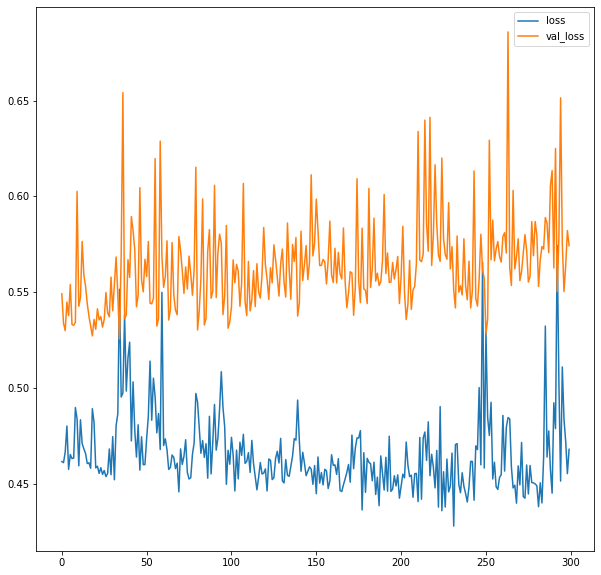

In [93]:
fig = plt.figure(figsize=(10, 10))

plt.plot(w_history.history["loss"][400:700], label="loss")
plt.plot(w_history.history["val_loss"][400:700], label="val_loss")

plt.legend(loc="upper right")

In [11]:
#ahora otra capa


w_l0 = tf.keras.layers.Dense(units=4, input_shape=[X_train.shape[1]]) #puede que no sea necesario sigmoid en la primera
w_l1 = tf.keras.layers.Dense(units=16, activation="relu")
w_l2 = tf.keras.layers.Dense(units=16, activation="relu")
w_l3 = tf.keras.layers.Dense(units=1, activation="sigmoid") #softmax para clasificacion multinomial y units tienen 
#que ser el numero de categorias que tenemos

# Dense => Deeply-Interconnected Layer, que es una capa de neuronas donde cada neurona recibe TODOS los outputs de la capa anterior
# y manda su output a TODOS los inputs de la capa siguiente
# units: cuántas neuronas tiene esta capa
# input_shape: La longitud de 1 solo registro (input) que va a pasar por esta capa
# Función de activación relu: y = max(0, x)

In [12]:
w2_model = tf.keras.Sequential([w_l0, w_l1, w_l2, w_l3])
# Sequential me conecta a las capas, recibe una lista con todas las capas que conforman a mi red

2022-06-25 09:38:26.335913: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-25 09:38:26.336019: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-25 09:38:26.336084: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (manuel-mint): /proc/driver/nvidia/version does not exist
2022-06-25 09:38:26.364234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
w2_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.001), metrics=["Accuracy", "binary_crossentropy"])
# loss: función de evaluación de error
# optimizer: Algoritmo de entrenamiento
# Adam es un algoritmo que utiliza el descenso de gradiente para identificar hacia qué dirección modificar los pesos y sesgos
# para disminuir nuestro error. El valor de 0.1 es el learning rate, que define el tamaño de los "saltos" que van a realizar
# nuestros pesos y sesgos para acercarse a su valor ideal

In [16]:
w2_history = w2_model.fit(X_train, y_train, epochs=800, verbose=True, validation_split=0.1)

Epoch 1/800
4/4 [==============================] - 3s 160ms/step - loss: 64.4894 - Accuracy: 0.5278 - binary_crossentropy: 64.4894 - val_loss: 4.6145 - val_Accuracy: 0.7500 - val_binary_crossentropy: 4.6145
Epoch 2/800
4/4 [==============================] - 0s 24ms/step - loss: 58.7230 - Accuracy: 0.5648 - binary_crossentropy: 58.7230 - val_loss: 1.7018 - val_Accuracy: 0.8333 - val_binary_crossentropy: 1.7018
Epoch 3/800
4/4 [==============================] - 0s 26ms/step - loss: 53.5715 - Accuracy: 0.5556 - binary_crossentropy: 53.5715 - val_loss: 0.4063 - val_Accuracy: 0.9167 - val_binary_crossentropy: 0.4063
Epoch 4/800
4/4 [==============================] - 0s 26ms/step - loss: 47.4960 - Accuracy: 0.5648 - binary_crossentropy: 47.4960 - val_loss: 1.2019 - val_Accuracy: 0.8333 - val_binary_crossentropy: 1.2019
Epoch 5/800
4/4 [==============================] - 0s 23ms/step - loss: 44.4232 - Accuracy: 0.5648 - binary_crossentropy: 44.4232 - val_loss: 2.0057 - val_Accuracy: 0.8333 - v

In [17]:
y2_pred = w2_model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [18]:
y2_pred_01 = []

for num in y2_pred:
  if num[0] < 0.5:
    y2_pred_01.append(0)
  else:
    y2_pred_01.append(1)

In [21]:
evaluate_model(y_test, y2_pred_01)

Precisión: 63.46153846153846
Sensibilidad: 47.82608695652174
Especificidad: 75.86206896551724
